# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [141]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [142]:
model = HANCWelfareModelClass(name='baseline')

In [143]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [144]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.chi = 0.0
ss.S = 0.0
ss.tau = 0.015

We can now solve and simulate:

In [145]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.8 secs [345 iterations]


In [146]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.1 secs [399 iterations]


And we can check whether the results make sort of sense:

In [147]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

model.ss.A_hh = 2.02
model.ss.L_hh = 1.06
model.ss.C_hh = 0.78


In [148]:
# model.test_hh_path()

## 3. <a id='toc3_'></a>[Test 2: Evaluating the objective for finding the steady state](#toc0_)

We can try out various inputs and look at the outputs:

In [149]:
ss.G = 0.0
ss.LG = 0.0
ss.S = 0.0

for KL in [2.0,3.0,4.0]:
    clearing_A = obj_ss(np.array([KL]),model,do_print=False)
    print(f'{KL = :.2f} -> {clearing_A = :12.8f}')

KL = 2.00 -> clearing_A = -102.04036425
KL = 3.00 -> clearing_A = -26.45898142
KL = 4.00 -> clearing_A =   1.89027650


In [159]:
print(f"wage (ss.w) = {model.ss.w:.2f}")
print(f"tax rate (ss.tau) = {model.ss.tau}")
print(f"after-tax wage (ss.wt) = {model.ss.wt}")
print(f"government labor (ss.LG) = {model.ss.LG}")
print(f"government services (ss.S) = {model.ss.S}")
print(f"government spendings (ss.G) = {model.ss.G}")
print(f"firm labor (ss.LY) = {model.ss.LY}")
print(f"household labor (ss.L_hh) = {model.ss.L_hh}")
print(f"labor (ss.L) = {model.ss.L}")
print(f"Assets (ss.A) = {model.ss.A}")
print(f"Rented Capital (ss.rk) = {model.ss.rK}")
print(f"Capital (ss.K) = {model.ss.K}")

wage (ss.w) = 1.03
tax rate (ss.tau) = 0.1
after-tax wage (ss.wt) = 0.9276483234944791
government labor (ss.LG) = 0.0
government services (ss.S) = 0.0
government spendings (ss.G) = 0.0
firm labor (ss.LY) = 0.9180860477026249
household labor (ss.L_hh) = 0.9180860477026249
labor (ss.L) = 0.9180860477026249
Assets (ss.A) = 3.3344645348434527
Rented Capital (ss.rk) = 0.12162458013810011
Capital (ss.K) = 3.3344645348434527


## 4. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

In [160]:
model.info(only_blocks=True)

production_firm: [K] -> [LY,rK,w,Y]
mutual_fund: [K,rK] -> [A,r]
government: [tau,w,chi] -> [B,wt,G,LG,S]
hh: [S,chi,r,tau,wt] -> [A_hh,C_hh,ELL_hh,L_hh,INC_hh,U_hh]
market_clearing: [A,A_hh,L,LY,LG,L_hh,Y,C_hh,K,G] -> [I,clearing_A,clearing_L,clearing_Y]


In [158]:
model.find_ss(LG=0.0,do_print=True)

starting at KL=3.8624

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.776e-14  0.000e+00]
       x: [ 3.632e+00  1.000e-01]
    nfev: 10
    fjac: [[-1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
       r: [-8.627e+00 -2.317e+00  0.000e+00]
     qtf: [-1.081e-10  0.000e+00]

steady state found in 18.6 secs
ss.K =  3.334
ss.B =  0.000
ss.A_hh =  3.334
ss.L =  0.918
ss.Y =  1.352
ss.r =  0.022
ss.w =  1.031
ss.G =  0.000
ss.LG =  0.000
ss.LY =  0.918
ss.G/ss.Y =  0.000
ss.tau =  0.100
ss.chi =  0.000
ss.clearing_A = 1.78e-14
ss.clearing_L = 0.00e+00
ss.clearing_Y = 0.00e+00


In [163]:
def target(LG):
    
    model.find_ss(LG)
    return -ss.U_hh

res = optimize.minimize_scalar(target,bounds=(0.0,ss.L_hh),method='bounded',
                            options={'disp':3})
tau_max_U_hh = res.x
max_U_hh = res.fun

 
 Func-count     x          f(x)          Procedure
    1       0.347251      4.63837        initial
    2       0.561865      3.54628        golden
    3       0.694503      3.20366        golden
    4       0.807181      2.98739        parabolic
    5       0.764142      3.06556        golden
    6       0.846117      2.91683        golden
    7        0.87018      2.86868        golden
    8       0.885053      2.83067        golden
    9       0.894244      2.79003        golden
   10       0.899925      3.32889        golden
   11       0.890733      2.81008        golden
   12       0.896414      2.86178        golden
   13       0.892903      2.79923        golden
   14       0.895073      2.78118        golden
   15       0.895585      2.78318        golden
   16        0.89515      2.77998        parabolic
   17       0.895286      2.77737        parabolic
   18         0.8954      2.77399        golden
   19       0.895471       2.7724        golden
   20       0.895514     

In [176]:
V_hh_ss = np.sum([par.beta**t*ss.U_hh for t in range(par.T)])
opt_G = par.Gamma_G*tau_max_U_hh


print(f'Optimal ss.LG to maximize expected discounted utility: {tau_max_U_hh:.4f}')
print(f'Optimal ss.G to maximize expected discounted utility: {opt_G:.4f}')
print(f'Total expected discounted utility: {V_hh_ss:.4f}')
print(f'G/Y: {opt_G/ss.Y:.4f}')

Optimal ss.LG to maximize expected discounted utility: 0.8954
Optimal ss.G to maximize expected discounted utility: 0.8954
Total expected discounted utility: -69.2593
G/Y: 40.1957


## 5. <a id='toc5_'></a>[Grid search](#toc0_)

In [213]:
par.tau_ss = 0.0
KL_min = ((1/par.beta+par.delta-1)/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))
KL_max = (par.delta/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))

In [215]:
NKL = 10
KL_vec = np.hstack((np.linspace(KL_min+1e-2,KL_max-1e-2,NKL),np.linspace(KL_max+1e-2,10.0,NKL)))
clearing_A_vec = np.nan*np.ones(KL_vec.size)
r_vec = np.nan*np.ones(KL_vec.size)

model_ = model.copy()
for i,KL in enumerate(KL_vec):
    print(f'{KL = :6.2f}: ',end='')
    try:
        clearing_A_vec[i] = obj_ss(np.array([KL,0.2]),model_,do_print=False)
        r_vec[i] = model_.ss.r
        print(f'clearing_A = {clearing_A_vec[i]:16.8f}')
    except Exception as e:
        print(e)

KL =   2.93: 

/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_II/steady_state.py:82: RuntimeWarning: invalid value encountered in double_scalars
  ss.Y = par.Gamma_Y*ss.K**(par.alpha)*ss.LY**(1-par.alpha)


setting an array element with a sequence.
KL =   3.14: setting an array element with a sequence.
KL =   3.34: setting an array element with a sequence.
KL =   3.55: setting an array element with a sequence.
KL =   3.76: setting an array element with a sequence.
KL =   3.97: setting an array element with a sequence.
KL =   4.17: setting an array element with a sequence.
KL =   4.38: setting an array element with a sequence.
KL =   4.59: setting an array element with a sequence.
KL =   4.79: setting an array element with a sequence.
KL =   4.81: setting an array element with a sequence.
KL =   5.39: setting an array element with a sequence.
KL =   5.97: setting an array element with a sequence.
KL =   6.54: setting an array element with a sequence.
KL =   7.12: setting an array element with a sequence.
KL =   7.70: setting an array element with a sequence.
KL =   8.27: setting an array element with a sequence.
KL =   8.85: setting an array element with a sequence.
KL =   9.42: setting an

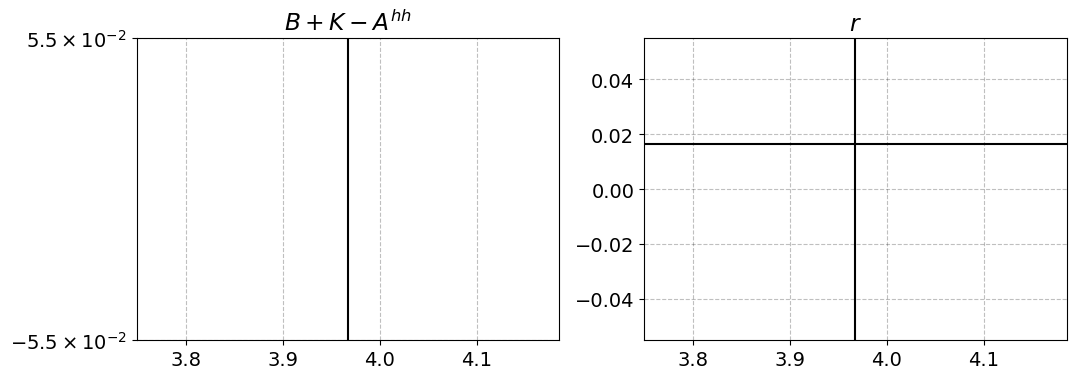

In [216]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('$B+K-A^{hh}$')
ax.plot(KL_vec[:NKL],clearing_A_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],clearing_A_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black')
ax.set_yscale('symlog')

ax = fig.add_subplot(1,2,2)
ax.set_title('$r$')
ax.plot(KL_vec[:NKL],r_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],r_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black');
ax.axhline(ss.r,color='black');

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

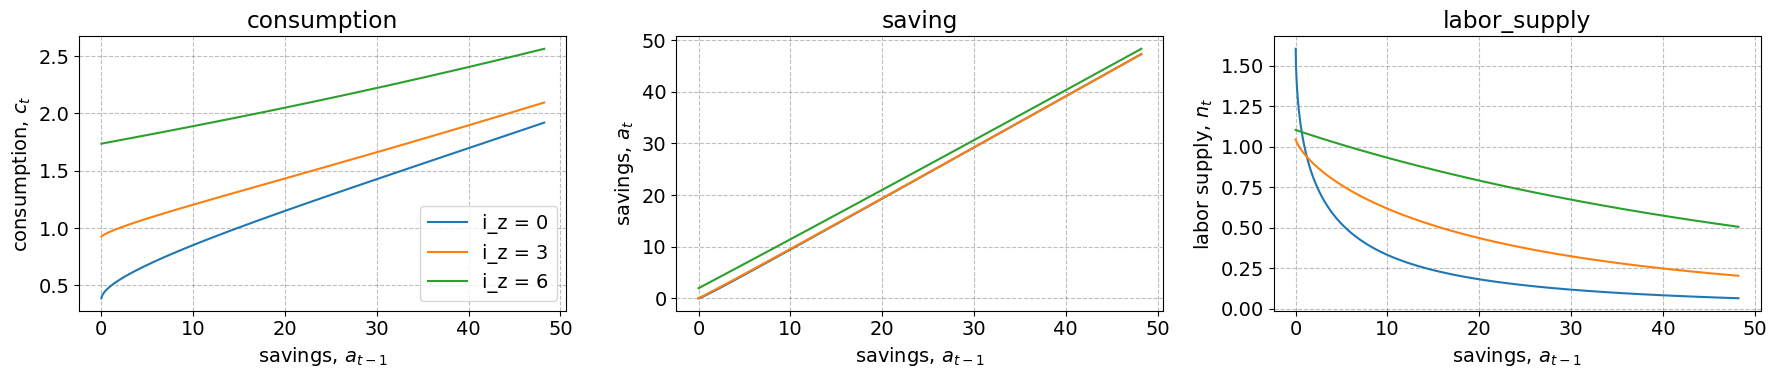

In [14]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

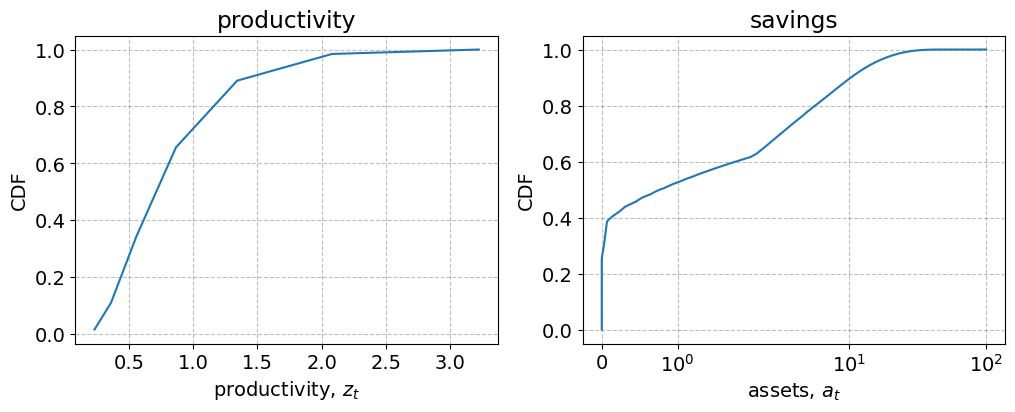

In [15]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [60]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

you need to update GEModelTools to call this function (optional)


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 1.8 secs
household problem simulated along transition in 0.2 secs



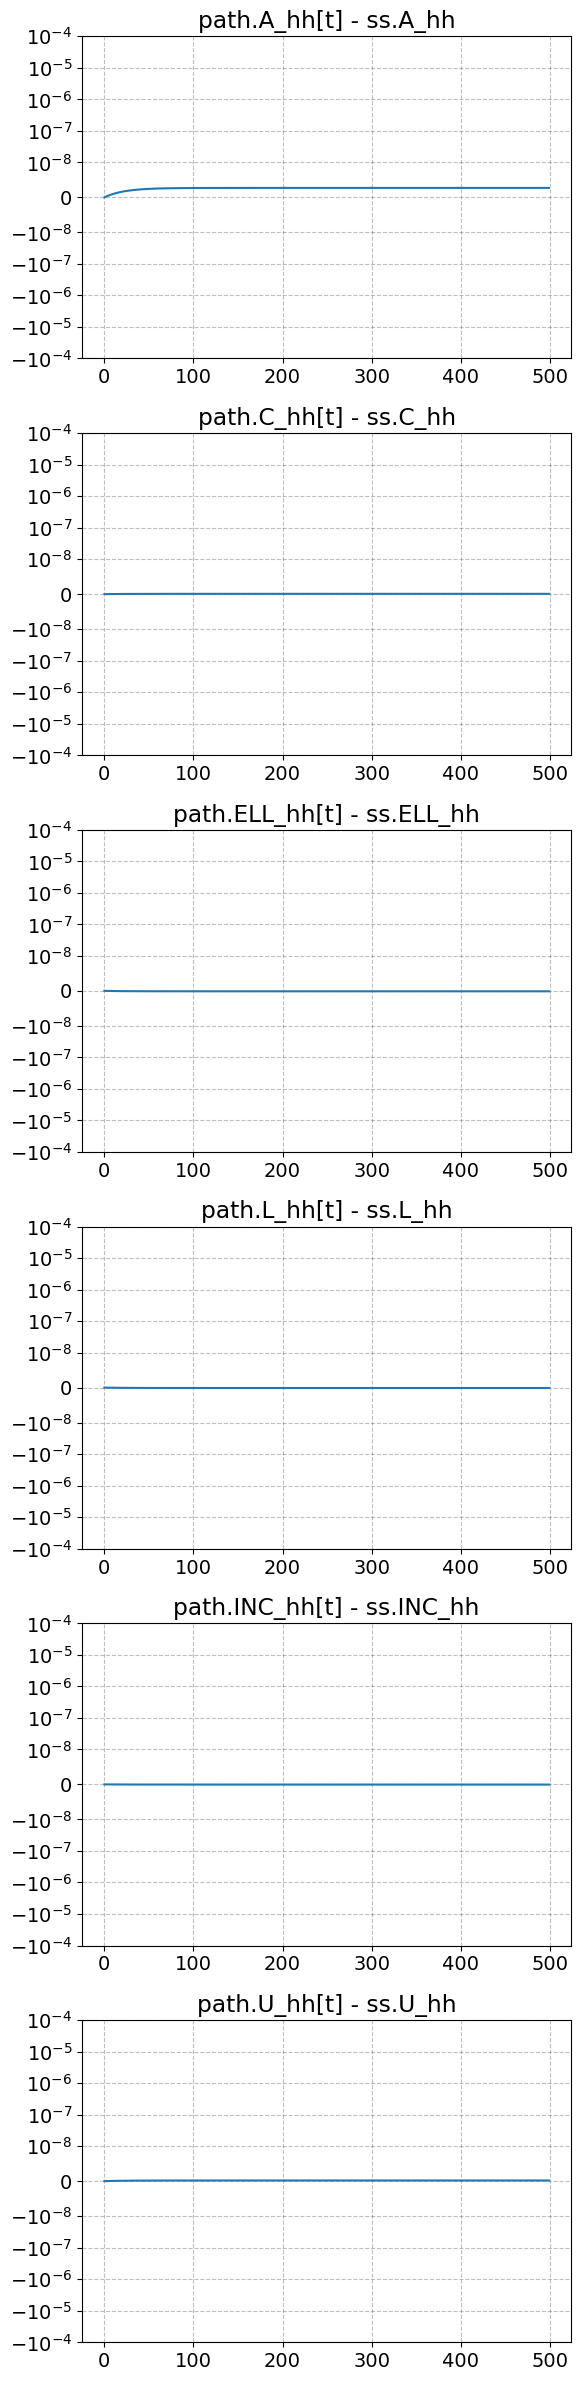

In [17]:
model.test_hh_path()

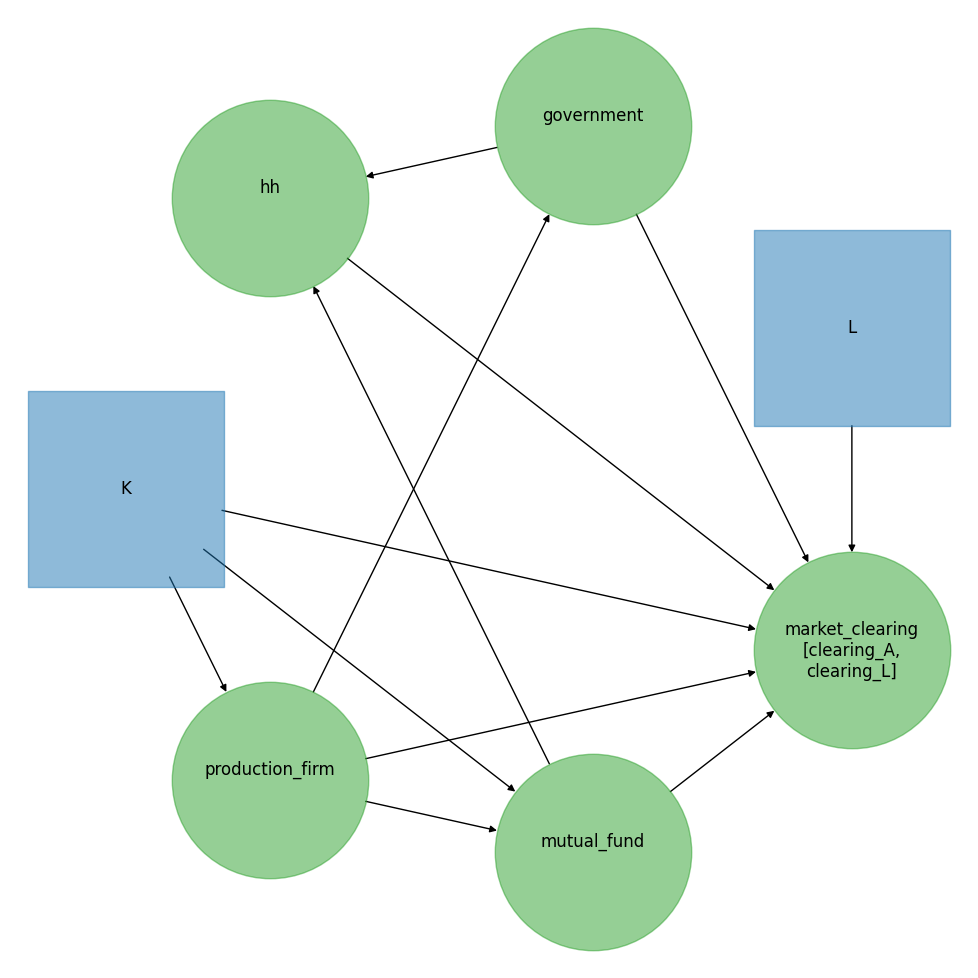

In [61]:
model.draw_DAG()

In [62]:
model.test_path(in_place=True)

shocks: 
unknowns: K L 

blocks.production_firm
 LY                   nan
 rK                   nan
 w                    nan
 Y                    nan
blocks.mutual_fund
 A                    nan
 r                    nan
blocks.government
 B                    nan
 tau                  nan
 wt                   nan
 G                    nan
hh


AssertionError: invalid values in path.r

## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [20]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 1.6 secs
curly_Y and curly_D calculated for wt              in 1.6 secs
curly_E calculated in 5.2 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 8.7 secs

full Jacobians:
full Jacobian to unknowns computed in 0.8 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.1 secs [in evaluate_blocks(): 0.0 secs]


In [21]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.70e-09
   2.70e-09 in clearing_A
   1.04e-10 in clearing_L
 it =   1 -> max. abs. error = 1.39e-13
   1.39e-13 in clearing_A
   3.44e-15 in clearing_L

transition path found in 5.1 secs
